In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import plotly as py
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.regressionplots import abline_plot

**Importing csv file and first 5 rows**

In [3]:
df = pd.read_csv("anxiety_data.csv")
df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN


**ANXIETY**

In [4]:
mask = df["Indicator"] == "Symptoms of Anxiety Disorder"
anx_df = df[mask]

anx_df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
70,Symptoms of Anxiety Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,30.8,30.0,31.7,30.0 - 31.7,NaN
71,Symptoms of Anxiety Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,40.2,38.1,42.4,38.1 - 42.4,NaN
72,Symptoms of Anxiety Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,34.4,32.6,36.1,32.6 - 36.1,NaN
73,Symptoms of Anxiety Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,34.1,32.1,36.2,32.1 - 36.2,NaN
74,Symptoms of Anxiety Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,31.0,29.0,33.1,29.0 - 33.1,NaN


**ANXIETY by Education**

In [5]:
mask = anx_df["Group"] == "By Education"
anx_edu_df = anx_df[mask]

anx_edu_df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
85,Symptoms of Anxiety Disorder,By Education,United States,Less than a high school diploma,1,Apr 23 - May 5,37.3,32.4,42.4,32.4 - 42.4,NaN
86,Symptoms of Anxiety Disorder,By Education,United States,High school diploma or GED,1,Apr 23 - May 5,30.6,29.0,32.3,29.0 - 32.3,NaN
87,Symptoms of Anxiety Disorder,By Education,United States,Some college/Associate's degree,1,Apr 23 - May 5,33.5,32.0,35.1,32.0 - 35.1,NaN
88,Symptoms of Anxiety Disorder,By Education,United States,Bachelor's degree or higher,1,Apr 23 - May 5,27.0,26.3,27.8,26.3 - 27.8,NaN
295,Symptoms of Anxiety Disorder,By Education,United States,Less than a high school diploma,2,May 7 - May 12,36.6,30.2,43.4,30.2 - 43.4,NaN


**Edu. Grouping for Anxiety**

In [6]:
edu = anx_edu_df.groupby("Subgroup")[["Value"]].describe()
edu

Value                                          \
                                count       mean       std   min    25%   50%   
Subgroup                                                                        
Bachelor's degree or higher       7.0  25.342857  1.800793  22.7  23.95  25.9   
High school diploma or GED        7.0  31.185714  1.159639  29.5  30.55  31.0   
Less than a high school diploma   7.0  37.314286  1.868536  34.3  36.75  37.3   
Some college/Associate's degree   7.0  32.642857  1.440899  30.2  31.95  32.8   

                                              
                                   75%   max  
Subgroup                                      
Bachelor's degree or higher      26.80  27.3  
High school diploma or GED       31.95  32.8  
Less than a high school diploma  37.75  40.6  
Some college/Associate's degree  33.55  34.5

In [7]:
# separate into different education levels
B_mask = anx_edu_df["Subgroup"] == "Bachelor's degree or higher"
B_edu = anx_edu_df[B_mask]

HS_mask = anx_edu_df["Subgroup"] == "High school diploma or GED"
HS_edu = anx_edu_df[HS_mask]

L_mask = anx_edu_df["Subgroup"] == "Less than a high school diploma"
L_edu = anx_edu_df[L_mask]

A_mask = anx_edu_df["Subgroup"] == "Some college/Associate's degree"
A_edu = anx_edu_df[A_mask]

In [8]:
# extract values
B = B_edu[["Value"]]
H = HS_edu[["Value"]]
L = L_edu[["Value"]]
A = A_edu[["Value"]]

**Visualization of Education Difference**

Text(0.5, 1.0, 'Mean Value by Education Level')

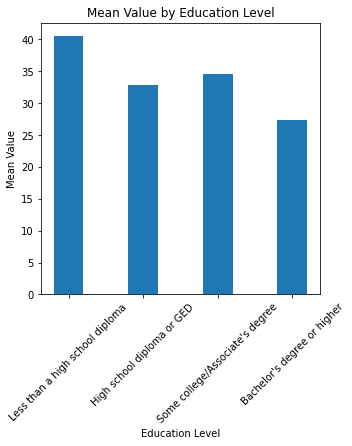

In [9]:
fig = plt.figure(figsize = (5, 5))

plt.bar(anx_edu_df["Subgroup"], 
        anx_edu_df["Value"], 
       width = 0.4)

plt.xlabel("Education Level")

plt.xticks(rotation=45)

plt.ylabel("Mean Value")

plt.title("Mean Value by Education Level")

In [10]:
model = ols('Value ~ C(Subgroup)', 
            data = anx_edu_df).fit()

sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Subgroup),3.0,511.435714,170.478571,67.14902,8.105638e-12
Residual,24.0,60.931429,2.538810,NaN,NaN


In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     67.15
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           8.11e-12
Time:                        22:13:06   Log-Likelihood:                -50.616
No. Observations:                  28   AIC:                             109.2
Df Residuals:                      24   BIC:                             114.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         25.3429      0.602     42.081      0.000      24.100      26.586
C(Subgroup)[T.High school diploma or GED]          5.8429      0.852      6.860      0.000       4.085       7.601
C(Subgroup)[T.Less than a high school diploma]    11.9714      0.852     14.056      0.000      10.214      13.729
C(Subgroup)[T.Some college/Associate's degree]     7.3000      0.852      8.571      0.000       5.542       9.058
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.965   Jarque-Bera (JB):                0.197
Skew:                          -0.104   Prob(JB):                        0.906
Kurtosis:                       2.646   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model.pvalues

Intercept                                         5.299537e-24
C(Subgroup)[T.High school diploma or GED]         4.279273e-07
C(Subgroup)[T.Less than a high school diploma]    4.431053e-13
C(Subgroup)[T.Some college/Associate's degree]    9.114016e-09
dtype: float64

Text(0.5, 0, 'Education Level')

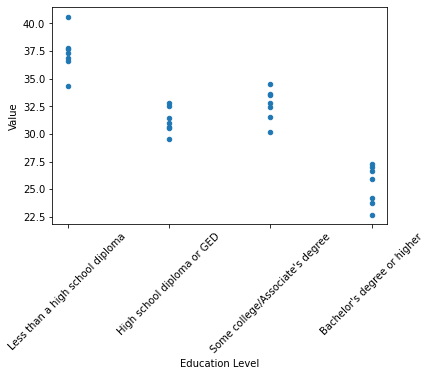

In [13]:
ax = anx_edu_df.plot(x = 'Subgroup',
                      y = 'Value', 
                      kind='scatter')

plt.xticks(rotation = 45)

plt.xlabel("Education Level")

Text(0, 0.5, 'Education Level')

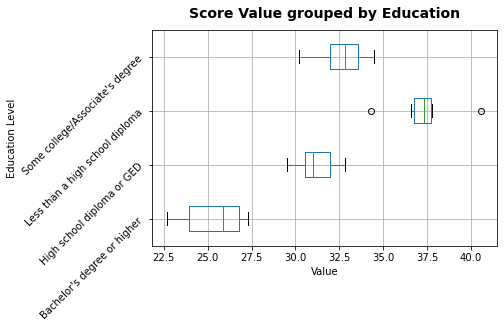

In [14]:
anx_edu_df.boxplot(column = "Value",
                    by = "Subgroup",
                   vert = False)

plt.yticks(rotation = 45)

plt.suptitle('Score Value grouped by Education', fontsize=14, fontweight='bold')
plt.title("")
plt.xlabel("Value")
plt.ylabel("Education Level")